In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rentsmart_all = pd.read_csv('rentsmart_20211130.csv', parse_dates=True, dtype={'zip_code': str })
rentsmart_all.head()

,date,violotaion_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [3]:
# Rename Columns
rentsmart_all.rename(columns={'violotaion_type': 'violation_type'}, inplace=True)
rentsmart_all.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [4]:
# Checking for violations without a neighboorhood
rentsmart_all[rentsmart_all['neighborhood'].isna()]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
46562,2021-03-26 00:00:00,Enforcement Violations,Improper storage trash: res,"571-575 Tremont St, 02118",NaN,02118,400220000,TREMONT UNION LLC MASS LLC,1899.0,2017.0,Mixed Use (Res. and Comm.),42.343678,-71.072627
59720,2020-12-23 00:00:00,Enforcement Violations,Improper storage trash: res,"571-575 Tremont St, 02118",NaN,02118,400220000,TREMONT UNION LLC MASS LLC,1899.0,2017.0,Mixed Use (Res. and Comm.),42.343678,-71.072627
72558,2020-09-29 13:23:00,Civic Maintenance Requests,Contractor Complaints,"21 Phipps St, 02129",NaN,02129,202370000,MISHAWUM PARK TENANTS ASSOC,1968.0,1998.0,Mixed Use (Res. and Comm.),42.376714,-71.067884
76204,2020-09-12 00:00:00,Enforcement Violations,Improper storage trash: res,"571-575 Tremont St, 02118",NaN,02118,400220000,TREMONT UNION LLC MASS LLC,1899.0,2017.0,Mixed Use (Res. and Comm.),42.343678,-71.072627
97466,2020-05-29 17:08:00,Housing Complaints,Unsatisfactory Living Conditions,"14 Linden St, 02134",NaN,02134,1500313000,ONEIL CARON TS,1900.0,1985.0,Residential 2-family,42.305847,-71.058393
145364,2019-08-08 00:00:00,Enforcement Violations,Improper storage trash: res,"571-575 Tremont St, 02118",NaN,02118,400220000,TREMONT UNION LLC MASS LLC,1899.0,2017.0,Mixed Use (Res. and Comm.),42.343678,-71.072627


In [5]:
# Checking for violations without a description
# Some of this data I suppose can't be filled with a 
# description as it would have to be inspected to 
# find more information as to what happened.
rentsmart_all[rentsmart_all['description'].isna()]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
59587,2020-12-24 00:00:00,Building Violations,NaN,"1139 Commonwealth Ave, 02134",Allston,02134,2100753000,1139 COMMONWEALTH LLC MASS LLC,1920.0,1980.0,Residential 7 or more units,42.351023,-71.126999
134233,2019-09-23 00:00:00,Building Violations,NaN,"1654 Washington St, 02118",Roxbury,02118,801447000,PAPPAS KAREN,1900.0,NaN,Residential 1-family,42.337550,-71.075020
169668,2019-03-11 00:00:00,Building Violations,NaN,"50 Cedar Lane Way, 02114",Boston,02114,501774000,GAUD SUSAN M TRSTS,1900.0,NaN,Residential 4 or more family,42.358533,-71.070284
169698,2019-03-11 00:00:00,Building Violations,NaN,"48 Cedar Lane Way, 02114",Boston,02114,501775000,GAUD SUSAN M TRSTS,1899.0,1998.0,Residential 4 or more family,42.358485,-71.070260
188544,2018-11-05 00:00:00,Building Violations,NaN,"58 Lubec St, 02128",East Boston,02128,104009000,DILIBERO NICOLA R JR TS,1907.0,NaN,Residential 4 or more family,42.370270,-71.033940
204554,2018-08-14 00:00:00,Building Violations,NaN,"530 Beacon St, 02215",Boston,02215,503701000,DENHARD WILLIAM G ETAL,1900.0,1999.0,Residential 7 or more units,42.350662,-71.091056
210424,2018-07-12 00:00:00,Building Violations,NaN,"21 Monument Ave, 02129",Charlestown,02129,203285000,SUH CHRISTOPHER,1853.0,2001.0,Residential 1-family,42.374280,-71.061980
210566,2018-07-12 00:00:00,Building Violations,NaN,"23 Monument Ave, 02129",Charlestown,02129,203286000,BORGSTROM PER HENRIK,1860.0,NaN,Residential 1-family,42.374330,-71.061946
210568,2018-07-12 00:00:00,Building Violations,NaN,"19 Monument Ave, 02129",Charlestown,02129,203284000,BRESLIN FLORENCE T,1860.0,NaN,Residential 1-family,42.374225,-71.062012
221015,2018-05-16 00:00:00,Building Violations,NaN,"41 High St, 02129",Charlestown,02129,203144000,FORTY 1 HIGH STREET CONDO TR,1999.0,2015.0,Condominium Main*,42.376428,-71.062759


In [6]:
# What are the most common violations?
rentsmart_all['violation_type'].value_counts()[:10]

Enforcement Violations        205557
Housing Complaints             57514
Sanitation Requests            37836
Civic Maintenance Requests      4798
Building Violations             3279
Housing Violations               323
Name: violation_type, dtype: int64

In [7]:
# What is the common descriptions for violations?
rentsmart_all['description'].value_counts()[:10]

Improper storage trash: res         139610
Overfilling of barrel/dumpster       19509
Abandoned Vehicles                   18326
Overgrown Weeds On Property          14490
Rodent Activity                      11790
Failure clear sidewalk - snow        11606
Unsatisfactory Living Conditions      9490
Work w/out Permit                     6403
Contractors Complaint                 5132
Illegal dumping < 1 cubic yd          4861
Name: description, dtype: int64

In [8]:
# Who are the landlords with most violations, and how many plots they possess?
rentsmart_all[['violation_type','owner','address']].groupby('owner').count().sort_values(by=['address'], ascending=False)[:10]

,violation_type,address
owner,,
GBM PORTFOLIO OWNER LLC,1945,1945
TS LAND TRUST LLC,472,472
BOBSON RESIDENTIAL LLC,426,426
CESCO LLC MASS LLC,424,424
JPNDC PITTS LLC,397,397
CUONG VU,368,368
ROIFF PAUL G TS,357,357
LACONCHA LIMITED PARTNERSHIP,349,349
COPLEY CONDOMINIUM TRUST,347,347


In [9]:
# which geographical areas have specific types of violations?

# Boston

boston_violations_unordered = rentsmart_all[['description','neighborhood']].loc[rentsmart_all['neighborhood'] == 'Boston']
boston_violations = boston_violations_unordered.groupby('description').count().sort_values(by=['neighborhood'], ascending=False)
boston_violations[:10]



,neighborhood
description,
Improper storage trash: res,37250
Overfilling of barrel/dumpster,2567
Improper storage trash: com,2482
Rodent Activity,2018
Abandoned Bicycle,1222
Empty Litter Basket,1216
Failure clear sidewalk - snow,968
Contractors Complaint,949
Unsatisfactory Living Conditions,925


In [10]:
# Dorchester

dot_violations_unordered = rentsmart_all[['description','neighborhood']].loc[rentsmart_all['neighborhood'] == 'Dorchester']
dot_violations = dot_violations_unordered.groupby('description').count().sort_values(by=['neighborhood'], ascending=False)
dot_violations[:10]

,neighborhood
description,
Improper storage trash: res,29284
Abandoned Vehicles,6684
Overgrown Weeds On Property,5402
Overfilling of barrel/dumpster,5393
Unsatisfactory Living Conditions,3589
Rodent Activity,3100
Failure clear sidewalk - snow,2218
Work w/out Permit,1471
"Heat - Excessive, Insufficient",1357


<AxesSubplot:xlabel='description'>

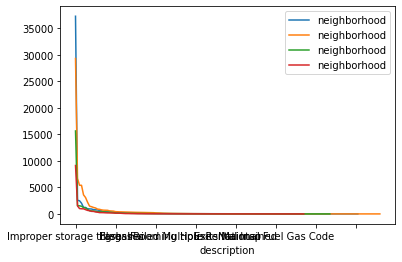

In [26]:
roxbury_violations_unordered = rentsmart_all[['description','neighborhood']].loc[rentsmart_all['neighborhood'] == 'Roxbury']
roxbury_violations = roxbury_violations_unordered.groupby('description').count().sort_values(by=['neighborhood'], ascending=False)

sb_violations_unordered = rentsmart_all[['description','neighborhood']].loc[rentsmart_all['neighborhood'] == 'South Boston']
sb_violations = sb_violations_unordered.groupby('description').count().sort_values(by=['neighborhood'], ascending=False)

boston_violations.rename(columns={"neighborhood":"Boston"})
dot_violations.rename(columns={"neighborhood":"Dorchester"})
roxbury_violations.rename(columns={"neighborhood":"Roxbury"})
sb_violations.rename(columns={"neighborhood":"South Boston"})

ax = boston_violations.plot(legend="Boston") # Blue
ax = dot_violations.plot(ax=ax, legend="Dorchester") # Orange
ax = roxbury_violations.plot(ax=ax, legend="Roxbury") # Green
sb_violations.plot(ax=ax, legend="South Boston") # Red

# Sadly I couldn't get to change the names, THe table seems to be build the wrong way and I've been tinkering at this for a while, like for 3 hours.